 ## 대표 색상(H변경) 관련 가설검증
 
    최초 작성일 : 2020/03/23
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        설문지(1) 사용 3번 문항
    
        - 설문조사 결과 그래프로 시각화
        
        - 성별에 따른 색상(FixedHue, bright) 인식 차이
        
        - 연령에 따른 색상(FixedHue, bright) 인식 차이
        
        - 패션 관심도에 따른 색상(FixedHue, bright) 인식 차이
        
        - definition + need 묶어서 색상(FixedHue, bright) 인식 차이 

        - Sex + Age 묶어서 색상(FixedHue, bright) 인식 차이

# 색상변경, bright

### 설문조사 결과를 토대로 대표 색상 설정

In [1]:
# 데이터 불러오기

hChanged_bright <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/hChanged_bright.csv")
str(hChanged_bright)
head(hChanged_bright)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ class : Factor w/ 6 levels "comp","doubleness1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,select,class,cnt
0,216,comp,1
1,72,comp,1
2,144,comp,1
3,288,comp,1
4,216,comp,1
5,original,comp,1


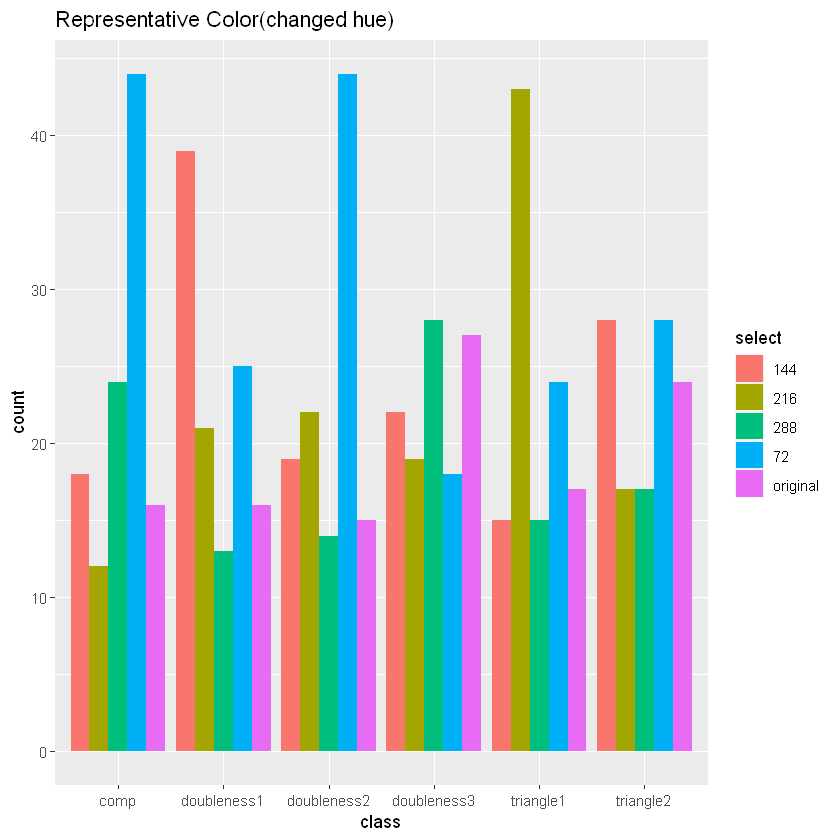

In [2]:
# 그래프로 상태 먼저 확인

# install.packages("ggplot2")
library("ggplot2")

# 각 샘플마다 나눠서 보기
ggplot(hChanged_bright, aes(class, fill=select)) + geom_bar(position="dodge") + labs(title="Representative Color(changed hue)")
# 음.. 상당히 일관성이 없는것같다ㅋㅋㅋㅋ

In [6]:
# 전체결과보기 위한 dataframe 새로 만들기
t_72 <- with(hChanged_bright, sum(cnt[select=="72"]))
t_144 <- with(hChanged_bright, sum(cnt[select=="144"]))
t_origin <- with(hChanged_bright, sum(cnt[select=="original"]))
t_216 <- with(hChanged_bright, sum(cnt[select=="216"]))
t_288 <- with(hChanged_bright, sum(cnt[select=="288"]))

# column 만들기
total <- c(t_72, t_144, t_origin, t_216, t_288)

# dataframe 만들기
df_hChanged_bright <- data.frame(total)
rownames(df_hChanged_bright) <- c("72", "144", "original", "216", "288")
library(tibble)
df_hChanged_bright2 <- rownames_to_column(df_hChanged_bright, var="select")

df_hChanged_bright2

Warning message:
"package 'tibble' was built under R version 3.6.2"

select,total
72,183
144,141
original,115
216,134
288,111


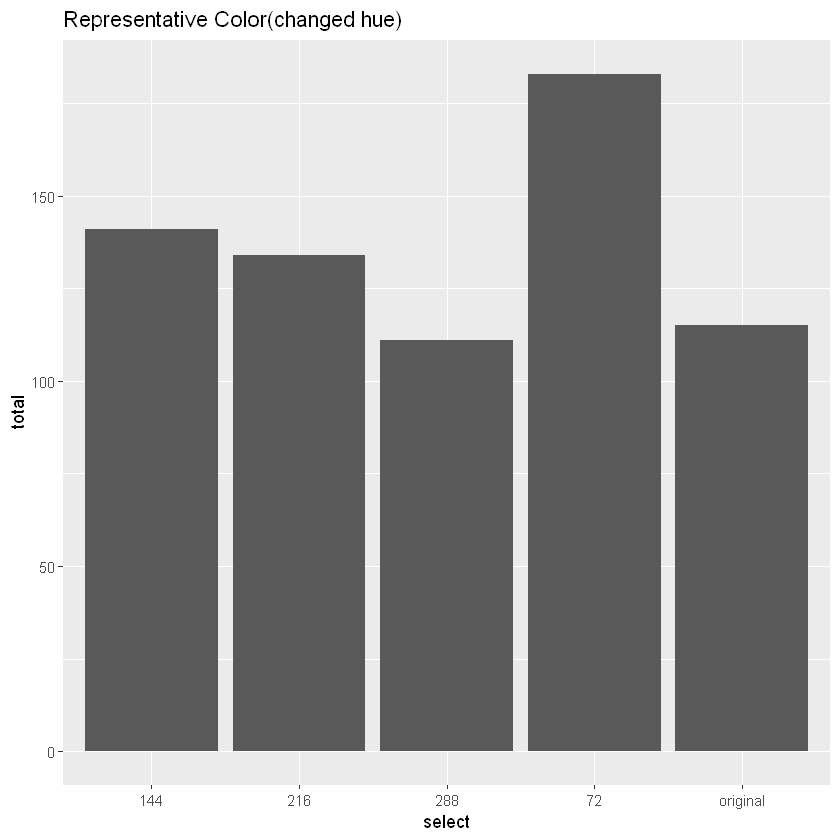

In [7]:
# 전체 결과 그래프로 확인

ggplot(df_hChanged_bright2, aes(x=select, y=total)) + geom_bar(stat="identity") + labs(title="Representative Color(changed hue)")

    설문조사 결과를 토대로 
    대표색상(색상변경,bright)은 "72º"의 값으로 설정
    (72도 : 피부색의 보색 원색에서 색 + 72º 한 값)
        
    그렇기에 앞으로 분석 방향은
    대표색상 "72º"로 설정하여 모든것을 진행할 것

# 전체

### 성별에 따른 대표 색상(색상변경, bright) 인식 차이 

    귀무가설 : 성별에 따라 대표 색상(색상변경, bright) 인식 차이가 없다
    대립가설 : 성별에 따라 대표 색상(색상변경, bright) 인식 차이가 있다
    
    - 대표 색상(색상변경, bright) : 72º
    - chisq.test 사용

In [9]:
# 데이터 불러오기

S_hCB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/S_hCB_cnt2.csv")
str(S_hCB_cnt)
head(S_hCB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex   : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,select,cnt
0,Male,216,1
1,Female,72,1
2,Female,144,1
3,Female,288,1
4,Female,216,1
5,Female,original,1


In [12]:
## 데이터프레임 재생성

# 남
Male_T <- with(S_hCB_cnt, sum(cnt[sex=="Male" & select == "72"]))
Male_F <- with(S_hCB_cnt, sum(cnt[sex=="Male" & select != "72"]))

# 여
Female_T <- with(S_hCB_cnt, sum(cnt[sex=="Female" & select == "72"]))
Female_F <- with(S_hCB_cnt, sum(cnt[sex=="Female" & select != "72"]))

# column 생성
Male <- c(Male_T, Male_F)
Female <- c(Female_T, Female_F)

# dataframe 만들기
df_S_hCB_cnt <- data.frame(Male, Female)
df_S_hCB_cnt <-t(df_S_hCB_cnt)
colnames(df_S_hCB_cnt) <- c("True", "False")


## 행, 열 각각의 합계 알아보기
addmargins(df_S_hCB_cnt)


## 카이제곱
chisq.test(df_S_hCB_cnt)
# p-value = 0.9611
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 성별에 따라 안면부위 인식 차이가 없음을 알 수 있다

,True,False,Sum
Male,41,115,156
Female,142,386,528
Sum,183,501,684



	Pearson's Chi-squared test with Yates' continuity correction

data:  df_S_hCB_cnt
X-squared = 0.0023771, df = 1, p-value = 0.9611


### 연령에 따른 대표 색상(색상변경, bright) 인식 차이 

    귀무가설 : 연령에 따라 대표 색상(색상변경, bright) 인식 차이가 없다
    대립가설 : 연령에 따라 대표 색상(색상변경, bright) 인식 차이가 있다
    
    - 대표 색상(색상변경, bright) : 72º
    - chisq.test 사용

In [13]:
# 데이터 불러오기

A_hCB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/A_hCB_cnt2.csv")
str(A_hCB_cnt)
head(A_hCB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ age   : int  20 20 20 20 20 20 20 20 20 20 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,age,select,cnt
0,20,216,1
1,20,72,1
2,20,144,1
3,20,288,1
4,20,216,1
5,20,original,1


In [21]:
## 데이터프레임 재생성

teens_T <- with(A_hCB_cnt, sum(cnt[age == "10" & select == "72"]))
teens_F <- with(A_hCB_cnt, sum(cnt[age == "10" & select != "72"]))

twenty_T <- with(A_hCB_cnt, sum(cnt[age == "20" & select == "72"]))
twenty_F <- with(A_hCB_cnt, sum(cnt[age == "20" & select != "72"]))

thirty_T <- with(A_hCB_cnt, sum(cnt[age == "30" & select == "72"]))
thirty_F <- with(A_hCB_cnt, sum(cnt[age == "30" & select != "72"]))

forty_T <- with(A_hCB_cnt, sum(cnt[age == "40" & select == "72"]))
forty_F <- with(A_hCB_cnt, sum(cnt[age == "40" & select != "72"]))

fifty_T <- with(A_hCB_cnt, sum(cnt[age == "50" & select == "72"]))
fifty_F <- with(A_hCB_cnt, sum(cnt[age == "50" & select != "72"]))

teens <- c(teens_T, teens_F)
twenty <- c(twenty_T, twenty_F)
thirty <- c(thirty_T, thirty_F)
forty <- c(forty_T, forty_F)
fifty <- c(fifty_T, fifty_F)
             
df_A_hCB_cnt <- data.frame(teens, twenty, thirty, forty, fifty)
df_A_hCB_cnt <- t(df_A_hCB_cnt)
colnames(df_A_hCB_cnt) <- c("True", "False")
# df_A_hCB_cnt


## 행, 열 각각의 합계 알아보기

addmargins(df_A_hCB_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용


## 카이제곱

chisq.test(df_A_hCB_cnt)
# p-value = 0.1682
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(df_A_hCB_cnt)
# p-value = 0.1287
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
teens,2,4,6
twenty,166,428,594
thirty,12,42,54
forty,3,15,18
fifty,0,12,12
Sum,183,501,684


Warning message in chisq.test(df_A_hCB_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_A_hCB_cnt
X-squared = 6.447, df = 4, p-value = 0.1682



	Fisher's Exact Test for Count Data

data:  df_A_hCB_cnt
p-value = 0.1287
alternative hypothesis: two.sided


### 패션 관심도에 따른 대표 색상(색상변경, bright) 인식 차이 

    귀무가설 : 패션 관심도에 따라 대표 색상(색상변경, bright) 인식 차이가 없다
    대립가설 : 패션 관심도에 따라 대표 색상(색상변경, bright) 인식 차이가 있다
    
    - 대표 색상(색상변경, bright) : 72º
    - chisq.test 사용

In [22]:
# 데이터 불러오기

I_hCB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/I_hCB_cnt.csv")
str(I_hCB_cnt)
head(I_hCB_cnt)

'data.frame':	684 obs. of  4 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ interest: int  5 5 3 3 4 2 5 3 4 4 ...
 $ select  : Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ cnt     : int  1 1 1 1 1 1 1 1 1 1 ...


X,interest,select,cnt
0,5,216,1
1,5,72,1
2,3,144,1
3,3,288,1
4,4,216,1
5,2,original,1


In [24]:
## 데이터프레임 재생성

I_True <- c()
I_False <- c()

for(i in seq(1,5, by=1)){
    True <- with(I_hCB_cnt, sum(cnt[interest==i & select =="72"]))
    I_True[[(i)]] <- True

    False <- with(I_hCB_cnt, sum(cnt[interest==i & select != "72"]))

    I_False[[i]] <- False
       
    interest_TF <- data.frame(True=I_True, False=I_False)
}

interest_TF

# 카이제곱

chisq.test(interest_TF)
# p-value = 0.9942
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(interest_TF)
# p-value = 0.9935
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 패션 관심도에 따른 색상 인식차이 없다

True,False
3,9
22,62
64,182
62,166
32,82


Warning message in chisq.test(interest_TF):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  interest_TF
X-squared = 0.22397, df = 4, p-value = 0.9942



	Fisher's Exact Test for Count Data

data:  interest_TF
p-value = 0.9935
alternative hypothesis: two.sided


### Defintion, Need 에 따른 대표 색상(색상변경, bright) 인식 차이 

    귀무가설 : definition + need 에 따라 대표 색상(색상변경, bright) 인식 차이가 없다
    대립가설 : definition + need 에 따라 대표 색상(색상변경, bright) 인식 차이가 있다
    
    definition + need 묶은 방법
    : bright + bright
    : bright + harmony
    : harmony + bright
    : harmony + harmony
    
    - 대표 색상(색상변경, bright) : 72º
    - chisq.test 사용

In [25]:
# 데이터 불러오기

DN_hCB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/DN_hCB_cnt.csv")
str(DN_hCB_cnt)
head(DN_hCB_cnt)

'data.frame':	684 obs. of  5 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ definition: Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need      : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ select    : Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ cnt       : int  1 1 1 1 1 1 1 1 1 1 ...


X,definition,need,select,cnt
0,harmony,harmony,216,1
1,bright,harmony,72,1
2,bright,bright,144,1
3,harmony,harmony,288,1
4,bright,bright,216,1
5,harmony,harmony,original,1


In [31]:
## 데이터프레임 재생성

# bright + bright
BB_T <- with(DN_hCB_cnt, sum(cnt[definition == "bright" & need == "bright" & select == "72"]))
BB_F <- with(DN_hCB_cnt, sum(cnt[definition == "bright" & need == "bright" & select != "72"]))
             
# bright + harmony
BH_T <- with(DN_hCB_cnt, sum(cnt[definition == "bright" & need == "harmony" & select == "72"]))
BH_F <- with(DN_hCB_cnt, sum(cnt[definition == "bright" & need == "harmony" & select != "72"]))

# harmony + bright
HB_T <- with(DN_hCB_cnt, sum(cnt[definition == "harmony" & need == "bright" & select == "72"]))
HB_F <- with(DN_hCB_cnt, sum(cnt[definition == "harmony" & need == "bright" & select != "72"]))

# harmony + harmony
HH_T <- with(DN_hCB_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select == "72"]))
HH_F <- with(DN_hCB_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select != "72"]))

BB <- c(BB_T, BB_F)
BH <- c(BH_T, BH_F)
HB <- c(HB_T, HB_F)
HH <- c(HH_T, HH_F)

df_DN_hCB_cnt <- data.frame(BB, BH, HB, HH)
df_DN_hCB_cnt <- t(df_DN_hCB_cnt)
colnames(df_DN_hCB_cnt) <- c("True", "False")
df_DN_hCB_cnt

## 행, 열 각각의 합계 알아보기
addmargins(df_DN_hCB_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_DN_hCB_cnt)
# p-value = 0.5762
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False
BB,32,100
BH,9,21
HB,41,91
HH,101,289


,True,False,Sum
BB,32,100,132
BH,9,21,30
HB,41,91,132
HH,101,289,390
Sum,183,501,684



	Pearson's Chi-squared test

data:  df_DN_hCB_cnt
X-squared = 1.9815, df = 3, p-value = 0.5762


#### Defintion, Need 에 따른 대표 색상(색상변경, bright) 선택 분석 

In [32]:
df_DN_hCB_cnt

,True,False
BB,32,100
BH,9,21
HB,41,91
HH,101,289


### 결과 해석 

     + BB, BH, HB, HH 에 따른 인식 차이 분석

     HH 선택이  제일 많음 
     -> 논문에서는 퍼스널 컬러의 정의가 "얼굴색을 밝게 해주는 색"이라고 표현하였으나 
        사람들이 일상에서 필요한 퍼스널 컬러는 "얼굴색과 조화를 이루는 색"이라고 생각됨

     선택 개수 : BB 132  BH 30  HB 132  HH 390
     definition과 need를 동일하게 선택한 결과가 많음

     맞춘 확률 : BB 24.2%   BH 30.0%   HB 31.1%   HH 25.9%
     need에서 Bright를 선택한 사람들의 정답 확률이 더 높은것을 볼 수 있음
     -> 본 설문지는 "밝기"에 관해서 물어보았다
        그렇기에 필요성 부분에 "밝기"로 선택한 사람들의 정답률이 더 높은 것으로 사료됨

### Sex, Age 에 따른 대표 색상(색상 변경, bright) 인식 차이 

    귀무가설 : sex + age 에 따라 대표 색상(색상변경, bright) 인식 차이가 없다
    대립가설 : sex + age 에 따라 대표 색상(색상변경, bright) 인식 차이가 있다
    
    - 대표 색상(색상변경, bright) : 72º
    - chisq.test 사용

In [2]:
# 데이터 불러오기

SA_hCB_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SA_hCB_cnt.csv")
str(SA_hCB_cnt)
head(SA_hCB_cnt)

'data.frame':	684 obs. of  5 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class: int  20 20 20 20 20 20 20 20 20 20 ...
 $ select   : Factor w/ 5 levels "144","216","288",..: 2 4 1 3 2 5 4 4 4 3 ...
 $ cnt      : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,age_class,select,cnt
0,Male,20,216,1
1,Female,20,72,1
2,Female,20,144,1
3,Female,20,288,1
4,Female,20,216,1
5,Female,20,original,1


In [3]:
## 데이터프레임 재생성

# Female + 10 
F10_T <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "10" & select == "72"]))
F10_F <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "10" & select != "72"]))

# Female + 20 
F20_T <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "20" & select == "72"]))
F20_F <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "20" & select != "72"]))

# Female + 30 
F30_T <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "30" & select == "72"]))
F30_F <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "30" & select != "72"]))

# Female + 40 
F40_T <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "40" & select == "72"]))
F40_F <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "40" & select != "72"]))

# Female + 50 
F50_T <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "50" & select == "72"]))
F50_F <- with(SA_hCB_cnt, sum(cnt[sex == "Female" & age_class == "50" & select != "72"]))

# Male + 10 
M10_T <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "10" & select == "72"]))
M10_F <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "10" & select != "72"]))

# Male + 20 
M20_T <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "20" & select == "72"]))
M20_F <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "20" & select != "72"]))

# Male + 30 
M30_T <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "30" & select == "72"]))
M30_F <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "30" & select != "72"]))

# Male + 40 
M40_T <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "40" & select == "72"]))
M40_F <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "40" & select != "72"]))

# Male + 50 
M50_T <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "50" & select == "72"]))
M50_F <- with(SA_hCB_cnt, sum(cnt[sex == "Male" & age_class == "50" & select != "72"]))


F10 <- c(F10_T, F10_F)
F20 <- c(F20_T, F20_F)
F30 <- c(F30_T, F30_F)
F40 <- c(F40_T, F40_F)
F50 <- c(F50_T, F50_F)

M10 <- c(M10_T, M10_F)
M20 <- c(M20_T, M20_F)
M30 <- c(M30_T, M30_F)
M40 <- c(M40_T, M40_F)
M50 <- c(M50_T, M50_F)

df_SA_hCB_cnt <- data.frame(F10, F20, F30, F40, F50, M10, M20, M30, M40, M50)
df_SA_hCB_cnt <- t(df_SA_hCB_cnt)
colnames(df_SA_hCB_cnt) <- c("True", "False")

## 행, 열 각각의 합계 알아보기
addmargins(df_SA_hCB_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_SA_hCB_cnt)
# p-value = NA
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test
fisher.test(df_SA_hCB_cnt)
# p-value = 0.2925
# 0.05보다 큰 값을 가지므로 귀무가설 성립

,True,False,Sum
F10,2,4,6
F20,128,328,456
F30,9,27,36
F40,3,15,18
F50,0,12,12
M10,0,0,0
M20,38,100,138
M30,3,15,18
M40,0,0,0
M50,0,0,0


Warning message in chisq.test(df_SA_hCB_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_SA_hCB_cnt
X-squared = NaN, df = 9, p-value = NA



	Fisher's Exact Test for Count Data

data:  df_SA_hCB_cnt
p-value = 0.2925
alternative hypothesis: two.sided


#### Sex, Age 에 따른 대표 색상(색상변경, bright) 선택 분석 

In [4]:
df_SA_hCB_cnt

,True,False
F10,2,4
F20,128,328
F30,9,27
F40,3,15
F50,0,12
M10,0,0
M20,38,100
M30,3,15
M40,0,0
M50,0,0


### 결과 해석 

     + Sex, Age 에 따른 인식 차이 분석

     정답 비율 
     F10 33.3%  F20 28.1%  F30 25.0%  F40 16.7%  F50  0.0% 
     M10  0.0%  M20 27.5%  M30 16.7%  M40  0.0%  M50  0.0%
     
     카테고리별 인원 수의 차이가 너무 심함
     
     앞의 분석 결과 
     성별에 따른 인식 차이가 없었고, 
     연령에 따른 인식 차이가 없었다.
     
     정답 확률 : 10대여자 > 20대여자 > 20대남자